In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 10

%matplotlib inline

In [3]:
test_result = pd.read_csv("data/6-3-1-logistic-regression.csv")
print(test_result.head())

   hours  result
0      0       0
1      0       0
2      0       0
3      0       0
4      0       0


<AxesSubplot: xlabel='hours', ylabel='result'>

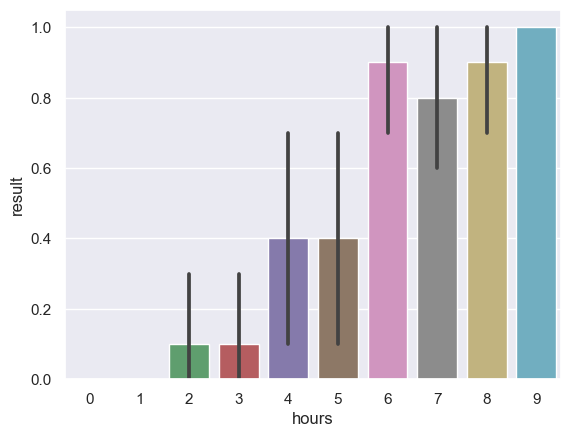

In [4]:
sns.barplot(x='hours', y='result', data=test_result)

In [5]:
print(test_result.groupby('hours').mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


In [9]:
mod_glm = smf.glm(formula = "result ~ hours",
                   data = test_result,
                   family = sm.families.Binomial()).fit() #이항분포 모델지정
#확률분포, 예측자, 링크함수. 이항분포에서 링크함수를 지정하지 않으면 자동으로 로짓함수가 지정
# 푸아송은 자동으로 로그함수
# sm.familes.Binomial(link = sm.families.links.logit)으로 명시적으로 로짓함수로 지정가능

In [10]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sat, 25 Feb 2023   Deviance:                       68.028
Time:                        06:52:45   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [12]:
mod_glm_null = smf.glm(
    "result ~ 1", data= test_result,
    family = sm.families.Binomial()).fit()

In [16]:
print("Null 모델: ", mod_glm_null.aic.round(3))
print("변수가 있는 모델:",  mod_glm.aic.round(3))

Null 모델:  139.989
변수가 있는 모델: 72.028


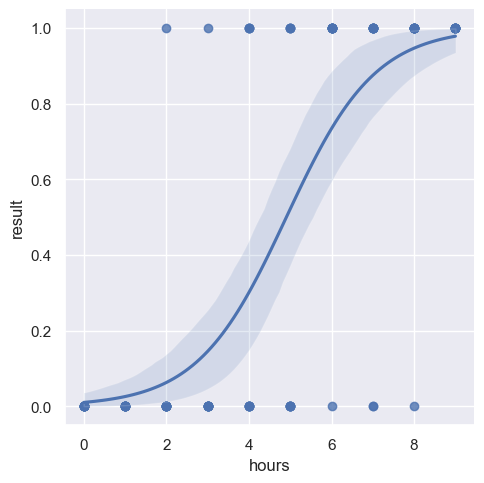

In [17]:
sns.lmplot(x= 'hours', y='result',
           data= test_result,
           logistic= True)

In [24]:
exp_val = pd.DataFrame({
    'hours':np.arange(0, 10, 1)
})

pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

In [27]:
# 6.3.17 로지스틱 회귀계수와 오즈비의 관계

exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [28]:
print(pred_1, pred_2)

0    0.025836
dtype: float64 0    0.06292
dtype: float64


In [30]:
odds_1 = pred_1/(1-pred_1)
odds_2 = pred_2/(1-pred_2)
sp.log(odds_2/odds_1)

C:\Users\tomat\AppData\Local\Temp\ipykernel_11568\693731444.py:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  sp.log(odds_2/odds_1)


array([0.9288901756])

In [31]:
mod_glm.params['hours']

0.9288901756

In [32]:
sp.exp(mod_glm.params['hours'])

C:\Users\tomat\AppData\Local\Temp\ipykernel_11568\2961665049.py:1: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(mod_glm.params['hours'])


2.5316978779